In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm
from network_cons import *

In [9]:
#setup
step_num = 5000
mode_num = 2
proportion = 0.5
h = 0.8
k_init = 2 #initial degree of each node

late_comer_mode = 0
# t_emerge = step_num // 3
t_emerge = 0
# t_unbias = step_num // 20
t_unbias = step_num + 1
# t_unbias = 5000

history_step_size = 0
eps = 1

distribution = 'identical'# 'uniform'
# distribution = 'uniform'


In [10]:
degrees, modes, fitnesses = net_grow( step_num, mode_num, proportion, h, k_init, late_comer_mode\
         , t_emerge, t_unbias, distribution, history_step_size, eps)

In [11]:
degrees

array([555,  50, 447, ...,   2,   2,   2])

In [13]:
modes

array([1, 1, 0, ..., 1, 0, 0])

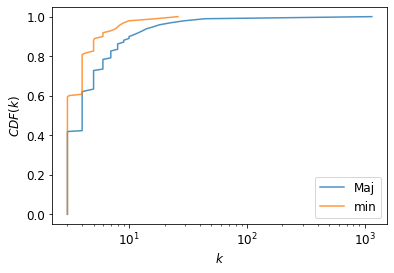

In [5]:
matplotlib.rcParams.update({'font.size': 12})

fig, ax = plt.subplots()

mode_labels = ['min', 'Maj']

division = np.logspace(np.log(0.01), np.log(1),1000)
distributions = []
for mode in list( range(mode_num-1, -1, -1) ):

    selected_nodes = np.all ([modes == mode, degrees > 2], 0)
    distribution = np.quantile( degrees[selected_nodes], division )
    distributions.append(distribution)
    # ax.plot( division, distribution, alpha = 0.8, label = mode_labels[mode])
    ax.plot( distribution, division, alpha = 0.8, label = mode_labels[mode])

ax.set_xscale('log')
# ax.set_xlim([0.6, 1])
# ax.set_xscale('log')
ax.set_xlabel('$k$')
ax.set_ylabel('$CDF(k)$')

ax.legend()


In [11]:
step_num = 2000
h = 0.8
bin_num  = 10
run_num = 1
degrees_ensemble = []
minority_degrees_ensemble = []
majority_degrees_ensemble = []
# t_unbias_array = list( np.arange(100, 500, 100) ) + list( np.arange(500, step_num, 500) )
# t_unbias_array = list( np.arange(100, step_num, 500) )
t_unbias_array = np.array([5000])
mode_num = 2
proportion = 0.1

k_init = 2

eps = 1
history_step_size = 1000
late_comer_mode = 0

proportion = 0.1
bins = []
histogram_history = []
t_emerge = 0

distribution = 'identical'

t_unbias_array = np.array( t_unbias_array )
for t_unbias in t_unbias_array:
#     print(t_unbias)
    iter_minor_means = []
    iter_major_means = []
    for i in range(run_num):
        degrees_history, history_steps, degrees, modes, fitnesses = net_grow( step_num, mode_num, proportion, h, k_init, late_comer_mode\
         , t_emerge, t_unbias, distribution, history_step_size, eps)

#         degrees_ensemble.append( degrees )
        if len(bins) == 0: #using the same bins for all
            bins = np.logspace(np.log10(degrees.min()),np.log10(degrees.max()), bin_num + 1)
        iter_minor_means.append( degrees[modes==0].mean() )
        iter_major_means.append( degrees[modes==1].mean() )
        hist, bins = np.histogram( degrees[modes==0], \
                                  bins = bins\
                                  , density = True )
        histogram_history.append(hist)
        minority_degrees_ensemble.append ( np.mean(iter_minor_means) )
        majority_degrees_ensemble.append ( np.mean( iter_major_means ) )

In [20]:
step_num = 50000
h = 0.8
t_unbias_array = np.array([5000])
eps = 1
history_step_size = 1000
proportion = 0.1
distribution = 'identical'

degrees_history, history_steps, degrees, modes, fitnesses = net_grow( step_num, mode_num, proportion, h, k_init, late_comer_mode\
 , t_emerge, t_unbias, distribution, history_step_size, eps)


<Figure size 432x288 with 0 Axes>

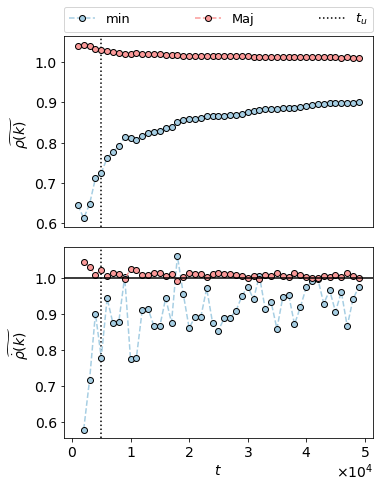

In [21]:
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable



fig = plt.figure()
figure_ratio = 0.2
fig = plt.figure(figsize=(5*(0.9+figure_ratio), 7 ))

gs = GridSpec(2, 1, height_ratios=[5, 5])
ax = fig.add_subplot(gs[0])
ay = fig.add_subplot(gs[1])


# divider = make_axes_locatable(ay)
# ax2 = divider.new_vertical(size="100%", pad=0.2)
# fig.add_axes(ax2)


# legend_ax = fig.add_axes([0,0.97,1,0.1])
# legend_ax.axis('off')


matplotlib.rcParams.update({'font.size': 14})

colors = sns.color_palette("Paired")
proportions = [proportion, 1-proportion]
# colors = plt.cm.Paired
labels = ['min', 'Maj']
for mode in range(mode_num):
    
    m_degrees = degrees_history[:, modes == mode ]
#     ax.plot( history_steps, m_degrees.mean(1)/degrees_history.mean(1), '--o'\
#         , c = colors[mode * 4], markeredgecolor = 'k', label = labels[mode] )
    # ax.set_xscale('log')
    # ax.set_yscale('log')

    ax.plot( history_steps, m_degrees.sum(1)/degrees_history.sum(1) / proportions[mode], '--o'\
        , c = colors[mode * 4], markeredgecolor = 'k', label = labels[mode] )
#     ax2.plot( history_steps, m_degrees.sum(1)/degrees_history.sum(1)/ proportions[mode], '--o'\
#         , c = colors[mode * 4], markeredgecolor = 'k')
    ay.plot( history_steps[1:]\
            , np.diff( m_degrees,axis = 0).sum(1) / np.diff( degrees_history ,axis = 0).sum(1) / proportions[mode]\
            , '--o' , c = colors[mode * 4], markeredgecolor = 'k' )


ay.set_xlim( ax.get_xlim() )


ay.set_ylabel('$ \\widetilde{ \dot{ \\rho}(k) } $')
ax.set_ylabel('$ \\widetilde{ \\rho(k) } $')
ay.set_xlabel('$ t $')

ay.axhline(1, c = 'k' )

ax.axvline(t_unbias, c='k', linestyle = 'dotted', zorder = 0)
ay.axvline(t_unbias, c='k', linestyle = 'dotted', zorder = 0, label = '$t_u$')


handles, labels = ax.get_legend_handles_labels()
handles_ay, labels_ay = ay.get_legend_handles_labels()

handles.extend( handles_ay )
labels.extend( labels_ay )

ax.legend(handles, labels, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3, fontsize = '13')

ay.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ay.xaxis.major.formatter._useMathText = True

ax.set_xticks([])

fig.tight_layout()
# plt.show()
fig.savefig('over-time_d_h8787=-' + str(h) + '-' + distribution +'-eps=' + str(eps) + '.png', dpi = 200, bbox_inches='tight')


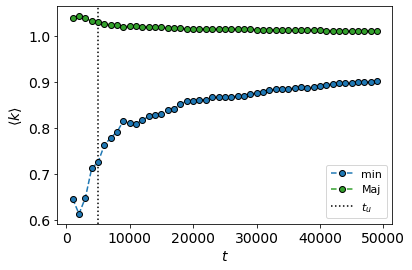

In [22]:
fig, ax = plt.subplots()

matplotlib.rcParams.update({'font.size': 15})

colors = sns.color_palette("Paired")
# colors = plt.cm.Paired
labels = ['min', 'Maj']
for mode in range(mode_num):
    
    m_degrees = degrees_history[:, modes == mode ]
    ax.plot( history_steps, m_degrees.mean(1)/degrees_history.mean(1), '--o'\
        , c = colors[mode * 2 + 1], markeredgecolor = 'k', label = labels[mode] )
    # ax.set_xscale('log')
    # ax.set_yscale('log')

    # ax.set_xlim( [ 0, 10 ] )
    ax.set_ylabel('$ \langle k \\rangle $')
    ax.set_xlabel('$ t $')




ax.axvline(t_unbias, c='k', linestyle = 'dotted', zorder = 0, label = '$t_u$')
# t_unbias
ax.legend(fontsize = '11')



plt.show()
# fig.savefig('over-time.png', dpi = 200, bbox_inches='tight')

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
from matplotlib import cm
from network_cons import *

In [35]:
#setup
step_num = 50000
mode_num = 2
proportion = 0
h = 0.8
k_init = 2 #initial degree of each node

late_comer_mode = 0
# t_emerge = step_num // 3
t_emerge = 0
# t_unbias = step_num // 20
t_unbias = step_num + 1
# t_unbias = 5000

history_step_size = 0
eps = 1

# distribution = 'identical'# 'uniform'
distribution = 'identical'


In [36]:
step_num = 5000
h = 0.8
run_num = 200
degrees_ensemble = []
proportion = 0.1
decay = False

if decay:
    minority_degrees_ensemble_decayed = []
else:
    minority_degrees_ensemble_no_decay = []
history_step_size = 0
# t_unbias_array = np.arange(step_num//40, step_num//4, step_num//40)
# t_unbias_array = list( np.arange(100, 500, 200) ) + list( np.arange(500, step_num, 750) )
t_unbias_array = [ 2, 100, 500, 1000, 1500, 2000 ]
t_unbias_values_num = len( t_unbias_array )
# t_unbias_array = list( np.arange(100, step_num, 500) )


decay_rates = np.linspace(0.5, 1, 3)

decay_rates = [1]

decay_values_num = len(decay_rates)

decay_df = pd.DataFrame(index = range(t_unbias_values_num * run_num * decay_values_num)\
            , columns = ['decay_rate','t_unbias', 'min_degree', 'maj_degree'], dtype = float)



if decay:
    eps = 0.9
else:
    eps = 1

distribution = 'identical'

t_unbias_array = np.array( t_unbias_array )

counter = 0
for decay_value in decay_rates:
    eps = decay_value
    for t_unbias in t_unbias_array:
        print(t_unbias)
        iter_means = []
        for i in range(run_num):
            degrees, modes, fitnesses = net_grow( step_num, mode_num, proportion, h, k_init, late_comer_mode\
             , t_emerge, t_unbias, distribution, history_step_size, eps)
            decay_df.loc[counter,'eps'] = eps
            decay_df.loc[counter,'t_unbias'] = t_unbias
            decay_df.loc[counter,'min_degree'] = degrees[modes==0].mean()
            decay_df.loc[counter,'maj_degree'] = degrees[modes==1].mean()
    #         degrees_ensemble.append( degrees )
            iter_means.append( degrees[modes==0].mean() )
            counter += 1


        if decay:
            minority_degrees_ensemble_decayed.append ( np.mean(iter_means) )
        else:
            minority_degrees_ensemble_no_decay.append ( np.mean(iter_means) )



2
100
500
1000
1500
2000


In [ ]:
summurized_decay_df = decay_df.groupby(['eps', 't_unbias']).mean().reset_index()

In [ ]:
summurized_decay_df.head()

In [ ]:
decay_rates = summurized_decay_df['eps'].unique()

In [ ]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()

colors = sns.color_palette("Paired")
mode = 1
# ax.plot( t_unbias_array / step_num, minority_degrees_ensemble_decayed, '--o'\
#         , c = 'darkorange', markeredgecolor = 'k', label = '$\epsilon = 0.9$' )

for d_i, decay_rate in enumerate(decay_rates):
    
    eps_specific_decay = summurized_decay_df.loc[ summurized_decay_df['eps'] == decay_rate ].drop(columns = ['eps', 'maj_degree'])
#     eps_specific_decay.plot(x = 't_unbias', ax = ax)
    x = eps_specific_decay['t_unbias'].to_numpy() / step_num
    y = eps_specific_decay['min_degree'].to_numpy()
    label = "$\epsilon=$" + str(decay_rate)
    
    ax.plot( x, y, '--o'\
        , c = colors[d_i],  markeredgecolor = 'k', label = label )
    

    
# ax.set_ylabel('$ \langle k_{m}(\infty) \\rangle $')
ax.set_ylabel('$ \langle k_{m} \\rangle $')

ax.set_xlabel('$ t_u $')


ax.axhline( degrees.mean(), c='k', linestyle = 'dashed', zorder = 0\
           , label = '$ \langle k \\rangle $')
# ax.legend(fontsize = '13')

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True


# fig.savefig('K.png', dpi = 200, bbox_inches='tight')
# fig.savefig('Unbiasing-Minority-End-K.png', dpi = 200, bbox_inches='tight')

ValueError: x and y must have same first dimension, but have shapes (6,) and (18,)

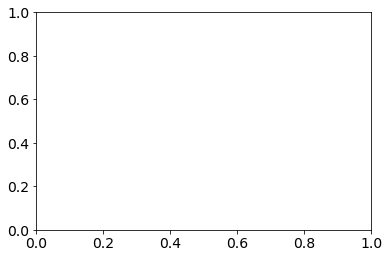

In [77]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()

ax.plot( t_unbias_array / step_num, minority_degrees_ensemble_no_decay, '--o'\
        , c = 'cornflowerblue', markeredgecolor = 'k', label = '$\epsilon = 1$' )

ax.plot( t_unbias_array / step_num, minority_degrees_ensemble_decayed, '--o'\
        , c = 'darkorange', markeredgecolor = 'k', label = '$\epsilon = 0.9$' )

ax.set_ylabel('$ \langle k_{m}(\infty) \\rangle $')
ax.set_xlabel('$ t_u $')


ax.axhline( degrees.mean(), c='k', linestyle = 'dashed', zorder = 0\
           , label = '$ \langle k \\rangle $')
ax.legend(fontsize = '13')

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True

# ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# ax.xaxis.major.formatter._useMathText = True

fig.savefig('K.png', dpi = 200, bbox_inches='tight')
# fig.savefig('Unbiasing-Minority-End-K.png', dpi = 200, bbox_inches='tight')

In [ ]:
# minority_degrees_ensemble_decayed

In [ ]:

matplotlib.rcParams.update({'font.size': 13})

colors = sns.color_palette("Paired")
# colors = plt.cm.Paired

for mode in range(mode_num):
    
    m_degrees = degrees_history[:, modes == mode ]
    ax.plot(history_steps, m_degrees.mean(1), '-', alpha = 0.5, c = colors[2 * mode + 1], markeredgecolor='k', linewidth = 2.5)
#     ax.set_xscale('log')
#     ax.set_yscale('log')

    # ax.set_xlim( [ 0, 10 ] )

ax.axvline(t_unbias, c='k', linestyle = 'dotted', zorder = 0)
# t_unbias

plt.show()

$p_\alpha$ : Proportion of group $\alpha$

$ \tilde{\rho_{\alpha}}(k)  = \frac { \Sigma{k_{\alpha} } }{ \Sigma{k}} \times \frac{1}{p_{\alpha}}   $

In [14]:
step_num = 5000
h = 0.8
run_num = 50
degrees_ensemble = []
proportion = 0.1
decay = False
t_unbias = step_num + 1

if decay:
    minority_degrees_ensemble_decayed = []
else:
    minority_degrees_ensemble_no_decay = []
    minority_min_ensemble = []
history_step_size = 0
# t_unbias_array = np.arange(step_num//40, step_num//4, step_num//40)
# t_unbias_array = list( np.arange(100, 500, 200) ) + list( np.arange(500, step_num, 750) )
t_unbias_array = [ 2, 50, 100, 500, 1000, 1500 ]
# np.floor( t_unbias_array * step_num )
# t_unbias_array = list( np.arange(100, step_num, 500) )

if decay:
    eps = 0.9
else:
    eps = 1

distribution = 'identical'

t_unbias_array = np.array( t_unbias_array )
for t_emerge in t_unbias_array:
    print(t_emerge, t_unbias)
    iter_means = []
    min_population = []
    for i in range(run_num):
        degrees, modes, fitnesses = net_grow( step_num, mode_num, proportion, h, k_init, late_comer_mode\
         , t_emerge, t_unbias, distribution, history_step_size, eps)

#         degrees_ensemble.append( degrees )
        iter_means.append( degrees[modes==0].mean() )
        min_population.append( (modes==0).sum() )
    if decay:
        minority_degrees_ensemble_decayed.append ( np.mean(iter_means) )
    else:
        minority_degrees_ensemble_no_decay.append ( np.mean(iter_means) )
        minority_min_ensemble.append( np.mean(min_population) )



2 5001
50 5001
100 5001
500 5001
1000 5001
1500 5001


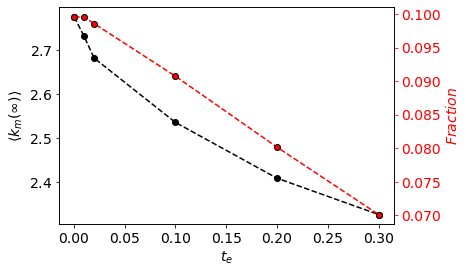

In [15]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()

ax.plot( t_unbias_array / step_num, minority_degrees_ensemble_no_decay, '--o'\
        , c = 'k', markeredgecolor = 'k', label = '$\epsilon = 1$' )
ax2 = ax.twinx()
ax2.plot( t_unbias_array / step_num, np.array( minority_min_ensemble ) / step_num, '--o'\
        , c = 'red', markeredgecolor = 'k', label = '$\epsilon = 0.9$' )

# ax2.tick_params(axis='y', colors=p2.get_color(), **tkw)
# twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)

ax2.tick_params(axis='y', colors='red')
# ax.tick_params(axis='y', colors=p3.get_color(), **tkw)


# ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_color('red')

ax2.set_ylabel('$ Fraction $')


ax.set_ylabel('$ \langle k_{m}(\infty) \\rangle $')
ax.set_xlabel('$ t_e $')


# ax.axhline( degrees.mean(), c='k', linestyle = 'dashed', zorder = 0\
#            , label = '$ \langle k \\rangle $')
# ax.legend(fontsize = '13')

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True

# ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# ax.xaxis.major.formatter._useMathText = True

# fig.savefig('K.png', dpi = 200, bbox_inches='tight')
fig.savefig('t_e_prop=0-1.png', dpi = 200, bbox_inches='tight')

array([0.90028, 0.88356, 0.81978, 0.74078, 0.6597 , 0.57978])